In [204]:
import pandas as pd

file_path = r'C:\Users\YaraAlaqeel\data_analysis\HR Analytics_Job Change of Data Scientists_After_processing.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"File '{file_path}' not found. Please check the file path and try again.")
except Exception as e:
    print(f"Error loading dataset: {str(e)}")

Dataset loaded successfully!


In [205]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## City column preprocessing

In [182]:
pip install category_encoders

In [206]:
import pandas as pd
from category_encoders import TargetEncoder

encoder = TargetEncoder(cols=['city'])

encoder.fit(df['city'], df['target'])#compute the target encoding for the specified column based on the target variable.

df['city'] = encoder.transform(df['city'], df['target'])

print(df)

       enrollee_id      city  city_development_index gender  \
0             8949  0.213088                   0.920   Male   
1            29725  0.147894                   0.776   Male   
2            11561  0.591044                   0.624    NaN   
3            33241  0.384382                   0.789    NaN   
4              666  0.289062                   0.767   Male   
...            ...       ...                     ...    ...   
21282         1289  0.213088                   0.920   Male   
21283          195  0.104096                   0.897   Male   
21284        31762  0.236364                   0.887   Male   
21285         7873  0.171053                   0.804   Male   
21286        12215  0.171053                   0.804   Male   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        Graduate   
2       No relevent experience   

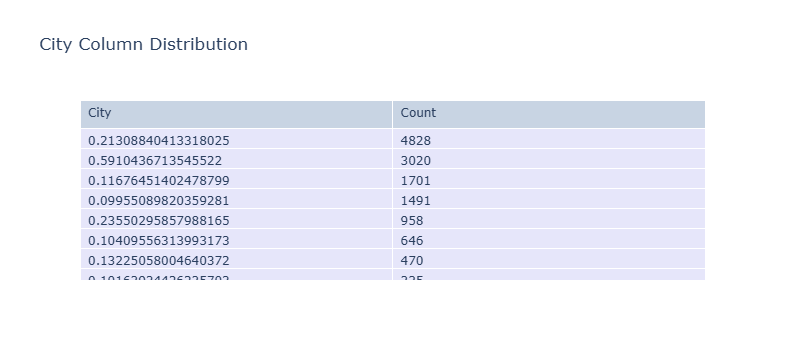

In [207]:
#Interactive tabel for visulizing this column using pandas and plotly
import pandas as pd
import plotly.graph_objects as go

city_counts = df['city'].value_counts(dropna=False).reset_index() #reset_index:convert this Series into a DataFrame:
city_counts.columns = ['city', 'count'] #rename the columns to city & count

# Create table
fig = go.Figure(data=[go.Table(
    header=dict(values=['City', 'Count'],
                fill_color='sky blue',
                align='left'),
    cells=dict(values=[city_counts['city'], city_counts['count']],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(title='City Column Distribution')
fig.show()

* Target encoding was applied to the "city" column to convert it into a numerical format based on its relationship with the target variable. This method captures the likelihood of each city leading to a positive outcome, preserving valuable information and improving the model's predictive performance by maintaining the statistical significance of each category. Additionally, this technique helps handle high-cardinality categorical variables by encoding them into meaningful numerical values.

## City_development_index column

* Display the outliers to investigate them

In [208]:
# Calculate quartiles and IQR
Q1 = df['city_development_index'].quantile(0.25)
Q3 = df['city_development_index'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['city_development_index'] < lower_bound) | (df['city_development_index'] > upper_bound)]

print("Records with outliers in 'city_development_index':")
print(outliers)

Records with outliers in 'city_development_index':
       enrollee_id      city  city_development_index gender  \
1523          8238  0.418597                   0.448    NaN   
4744         30985  0.418597                   0.448    NaN   
5010         27970  0.418597                   0.448   Male   
5265         31194  0.418597                   0.448    NaN   
5567           598  0.418597                   0.448    NaN   
6127         18564  0.418597                   0.448    NaN   
7724         31179  0.418597                   0.448   Male   
7864         26838  0.418597                   0.448   Male   
9134          4858  0.418597                   0.448    NaN   
10401        19463  0.418597                   0.448   Male   
13549        28317  0.418597                   0.448    NaN   
14913         3891  0.418597                   0.448   Male   
15114         4776  0.418597                   0.448    NaN   
16555        30131  0.418597                   0.448   Male   
1678

##### Counclusion!!!: All the outliers are from the city_33 which is encoded to 0.418597.
approach:
* Check if outliers are due data entry error
* Apply capping technique becaues it is effective when the data contains extreme values that are not errors but are still significantly different from other observations.
* NOTE!! : I applied logarithmatic transformation but I found that the outliers were worse becaues my data is between 0-1 .

In [209]:
# Capping the outliers
df['city_development_index'] = np.where(df['city_development_index'] < lower_bound, lower_bound, df['city_development_index'])
df['city_development_index'] = np.where(df['city_development_index'] > upper_bound, upper_bound, df['city_development_index'])

# Display the capped data
print("\Outliers before capping (with capped values):")
print(df.loc[outliers.index])

\Outliers before capping (with capped values):
       enrollee_id      city  city_development_index gender  \
1523          8238  0.418597                  0.4675    NaN   
4744         30985  0.418597                  0.4675    NaN   
5010         27970  0.418597                  0.4675   Male   
5265         31194  0.418597                  0.4675    NaN   
5567           598  0.418597                  0.4675    NaN   
6127         18564  0.418597                  0.4675    NaN   
7724         31179  0.418597                  0.4675   Male   
7864         26838  0.418597                  0.4675   Male   
9134          4858  0.418597                  0.4675    NaN   
10401        19463  0.418597                  0.4675   Male   
13549        28317  0.418597                  0.4675    NaN   
14913         3891  0.418597                  0.4675   Male   
15114         4776  0.418597                  0.4675    NaN   
16555        30131  0.418597                  0.4675   Male   
16784   

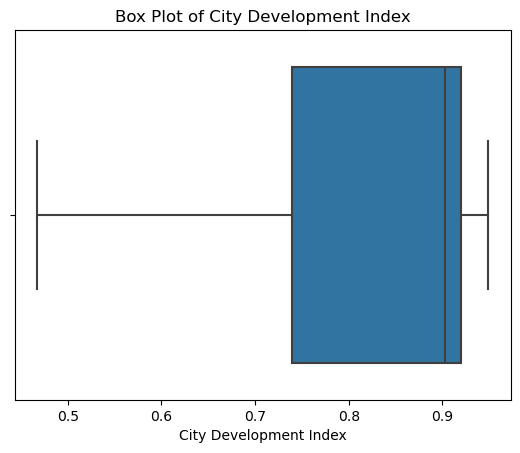

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a box plot
sns.boxplot(x=df['city_development_index'])
plt.xlabel('City Development Index')
plt.title('Box Plot of City Development Index')
plt.show()

* We applied capping, also known as the Winsorization technique, to limit extreme values in our data, thereby reducing the impact of outliers. As shown in the figure, the outliers are now capped at 4.467 which is in the whisker range of the box figure.

## enrolled_university column

In [211]:
null_values=df[df['enrolled_university'].isnull()]
print(null_values)

       enrollee_id      city  city_development_index gender  \
3            33241  0.384382                   0.789    NaN   
13            5826  0.591044                   0.624   Male   
62           24690  0.202295                   0.827    NaN   
69            4830  0.314721                   0.698    NaN   
171          12384  0.416642                   0.698    NaN   
...            ...       ...                     ...    ...   
20921        20165  0.276361                   0.698    NaN   
20998        24947  0.099551                   0.926   Male   
21070        10834  0.099551                   0.926    NaN   
21224        13605  0.171877                   0.743   Male   
21266        19499  0.101639                   0.939    NaN   

           relevent_experience enrolled_university education_level  \
3       No relevent experience                 NaN        Graduate   
13      No relevent experience                 NaN             NaN   
62     Has relevent experience   

As shown, predicting these values using a rule-based model isn't feasible (they could be predicted using a machine learning model). Since the null values in this column account for 1.96% of the data, I will delete these rows.

In [212]:
import pandas as pd
dropna_enrolled_university = df.dropna(subset=['enrolled_university'], inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20870 entries, 0 to 21286
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             20870 non-null  int64  
 1   city                    20870 non-null  float64
 2   city_development_index  20870 non-null  float64
 3   gender                  16040 non-null  object 
 4   relevent_experience     20870 non-null  object 
 5   enrolled_university     20870 non-null  object 
 6   education_level         20463 non-null  object 
 7   major_discipline        17913 non-null  object 
 8   experience              20805 non-null  object 
 9   company_size            14561 non-null  object 
 10  company_type            14355 non-null  object 
 11  last_new_job            20443 non-null  object 
 12  training_hours          20870 non-null  int64  
 13  target                  18772 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory u

In [213]:
total_count_before= 21287
total_count_after= 20870
percentage_retained = (total_count_after / total_count_before) * 100
print(f"Percentage retained after dropping nulls: {percentage_retained:.2f}%")

Percentage retained after dropping nulls: 98.04%


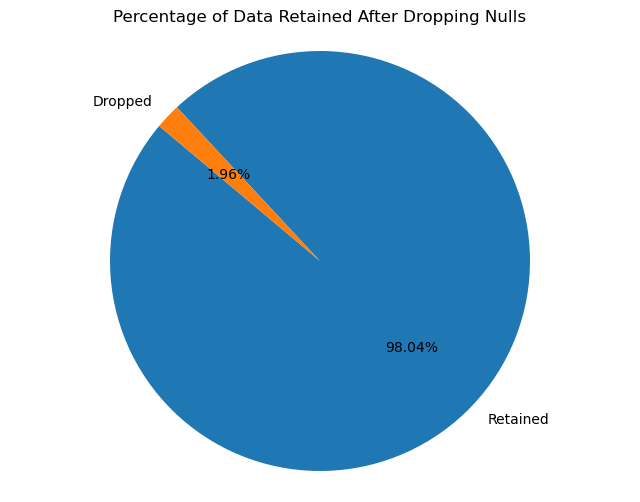

In [214]:
import matplotlib.pyplot as plt

total_count_before = 21287
total_count_after = 20870
percentage_dropped = 100.0 - percentage_retained

labels = ['Retained', 'Dropped']
sizes = [percentage_retained, percentage_dropped]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title('Percentage of Data Retained After Dropping Nulls')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


* A percentage retained after dropping nulls of 98.04% indicates that nearly all of the original data remains intact after removing rows where the 'enrolled_university' column had missing values. This suggests minimal impact from data loss, ensuring that the majority of rows with complete 'enrolled_university' information are retained for analysis. 

## education_level column

In [215]:
null_values_of_education=df[df['education_level'].isnull()]
print(null_values_of_education)

       enrollee_id      city  city_development_index gender  \
39           24659  0.146617                   0.884   Male   
136           3116  0.591044                   0.624   Male   
153           8241  0.116765                   0.910    NaN   
217           5278  0.591044                   0.624   Male   
301          30472  0.591044                   0.624   Male   
...            ...       ...                     ...    ...   
21178         8837  0.159629                   0.915    NaN   
21221         2599  0.087912                   0.899    NaN   
21225         3445  0.235503                   0.920    NaN   
21232        23948  0.213088                   0.920   Male   
21251        27216  0.591044                   0.624    NaN   

           relevent_experience enrolled_university education_level  \
39      No relevent experience       no_enrollment             NaN   
136     No relevent experience       no_enrollment             NaN   
153    Has relevent experience   

In [216]:
null_values_of_education=df[df['major_discipline'].isnull()]
print(null_values_of_education)

       enrollee_id      city  city_development_index  gender  \
6            28806  0.235503                   0.920    Male   
10           29452  0.591044                   0.624     NaN   
14            8722  0.591044                   0.624     NaN   
25           14505  0.132251                   0.855     NaN   
28           21538  0.236364                   0.887    Male   
...            ...       ...                     ...     ...   
21277         8905  0.416642                   0.698     NaN   
21278         9772  0.099551                   0.926    Male   
21281        21339  0.591044                   0.624  Female   
21284        31762  0.236364                   0.887    Male   
21285         7873  0.171053                   0.804    Male   

           relevent_experience enrolled_university education_level  \
6      Has relevent experience       no_enrollment     High School   
10      No relevent experience    Full time course     High School   
14      No relevent e

The data indicates that most of the entries with a missing 'education_level' also have a missing 'major_discipline.' Additionally, the majority of the entries with a missing 'major_discipline' have 'education_level' listed as 'High School'.

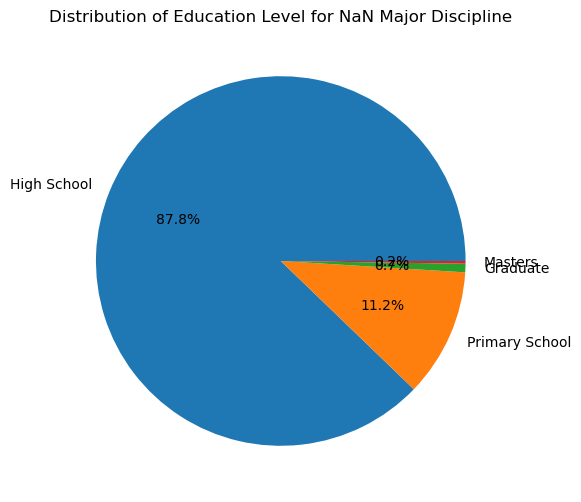

In [227]:
majors_nan = df[df['major_discipline'].isnull()]

# Count the'education_level' for these rows
education_level_nan_distribution = majors_nan['education_level'].value_counts()

# Plotting as a pie chart
plt.figure(figsize=(10, 6))
education_level_nan_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Education Level for NaN Major Discipline')
plt.ylabel('')  
plt.show()

If an individual's 'major_discipline' is missing (NaN), it is generally assumed with 85.8% certainty that they have completed high school. Therefore, in cases where 'major_discipline' is NaN, I will replace the corresponding 'education_level' with 'High School'.

In [218]:
education_level_before = df['education_level'].value_counts(dropna=False)
print(education_level_before)

education_level
Graduate          12681
Masters            4800
High School        2189
Phd                 461
NaN                 407
Primary School      332
Name: count, dtype: int64


In [220]:
#replace 'education_level' with 'High School' where 'major_discipline' is NaN
mask = df['education_level'].isnull() & df['major_discipline'].isnull()
df.loc[mask, 'education_level'] = 'High School'
education_level_after = df['education_level'].value_counts()

In [222]:
education_level_after = df['education_level'].value_counts()
print(education_level_after)

education_level
Graduate          12681
Masters            4800
High School        2596
Phd                 461
Primary School      332
Name: count, dtype: int64


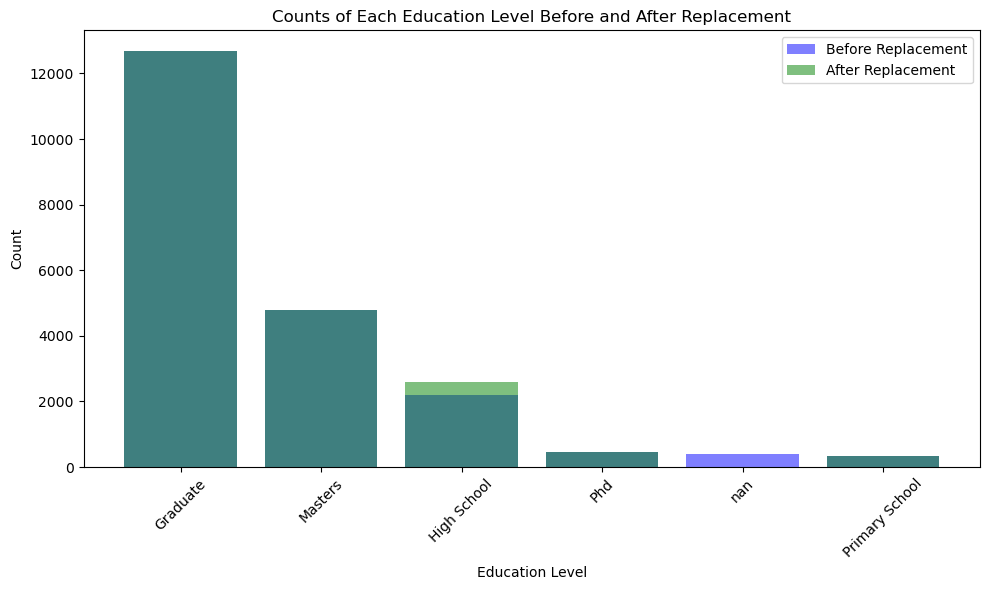

In [230]:
# Plotting the changes
plt.figure(figsize=(10, 6))

plt.bar(education_level_before.index.astype(str), education_level_before.values, alpha=0.5, color='b', label='Before Replacement')

plt.bar(education_level_after.index.astype(str), education_level_after.values, alpha=0.5, color='g', label='After Replacement')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Counts of Each Education Level Before and After Replacement')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## load the new dataset

In [236]:
import pandas as pd

df.to_csv('modified_data.csv', index=False)
df_modified = pd.read_csv('modified_data.csv')
df_modified.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0.213088,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,0.147894,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,0.591044,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,666,0.289062,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
4,21651,0.274683,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
